# Test using wavelet cross-spectrum to find the phase difference between the high-Q glider signals recorded on different component of the same station

In [47]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp
from numpy import geomspace, meshgrid, flip, pi

from utils_basic import get_unique_stations, power2db
from utils_basic import GEO_COMPONENTS as components, ROOTDIR_GEO as rootdir
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import extract_freq_phase_pairs, get_stream_component_cross_spectra, get_cwt_freqs
from utils_plot import plot_cwt_component_cross_spectra, save_figure

In [48]:
# Inputs
## Input data
starttime = Timestamp("2020-01-13T19:36:12Z")
dur = 45.0
station = "A06"

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
scales = geomspace(10, 50, 100)

## Frequency limits for extracting the frequency-phase pairs
freqmin_window = 40.0
freqmax_window = 100.0

## Plotting
cohe_threshold = 0.8
power_threshold = 0.0
freqlim_plot = (40.0, 120.0)

dbmin_spec = 0.0
dbmax_spec = 30.0

dbmin_cross = 0.0
dbmax_cross = 60.0

In [49]:
# Read the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=[station])

In [50]:
# Compute the component cross spectra
specs, cross_specs = get_stream_component_cross_spectra(stream, wavelet, bandwidth, center_freq, scales)

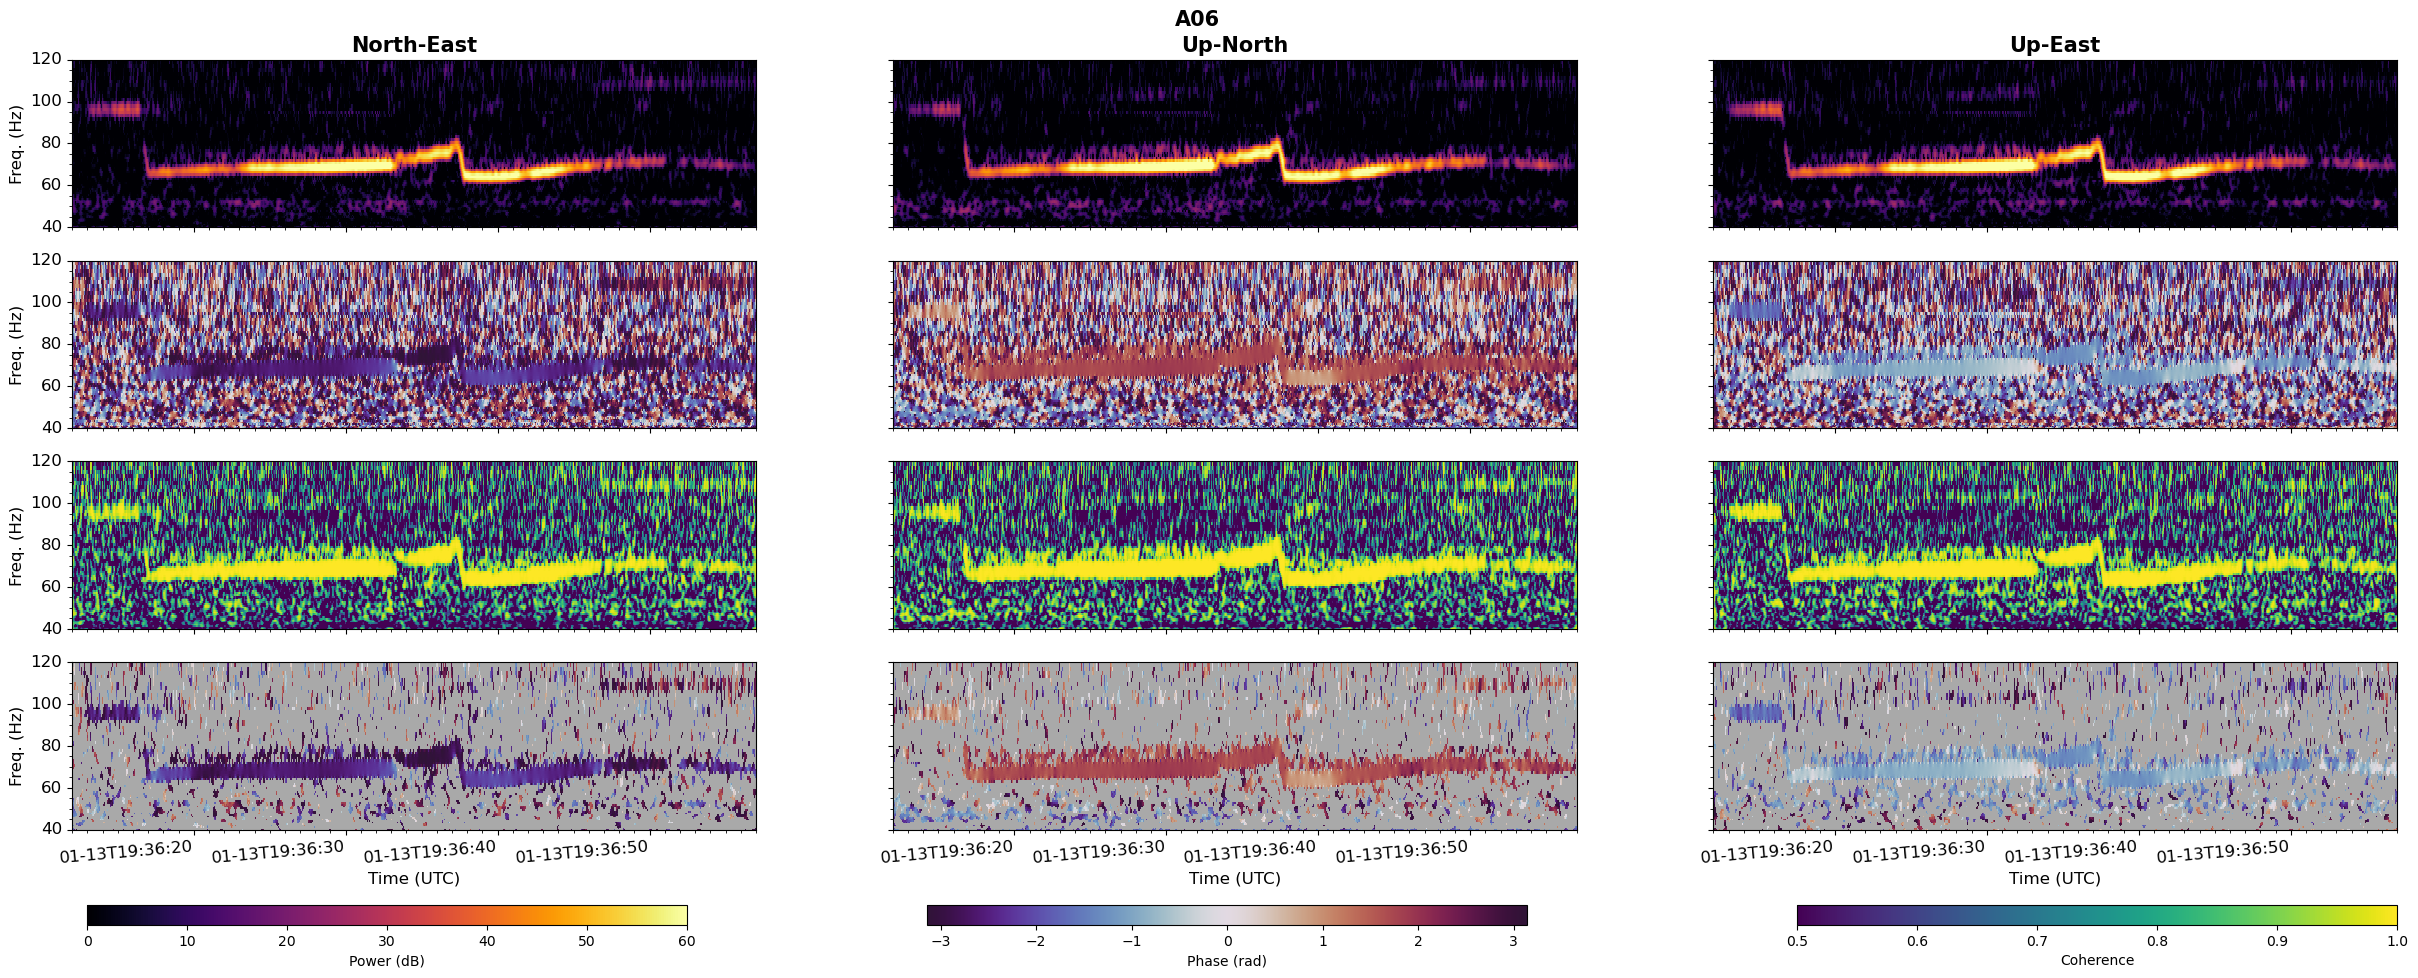

In [51]:
# Plot the cross spectra
fig, axes, power_cbar, phase_cbar, cohe_cbar = plot_cwt_component_cross_spectra(cross_specs, station, freqlim=freqlim_plot, dbmin=dbmin_cross, dbmax=dbmax_cross, cohe_threshold=cohe_threshold, power_threshold=power_threshold)